In [1]:
import pyomo.environ as pyo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import geopandas as gpd
from hydro_opt import hydro_opt

In [2]:
low_conversion_cost = hydro_opt(h2_to_nh3_plant_cost = 0, h2_to_ch3oh_plant_cost = 0)
low_conversion_cost.optimize()

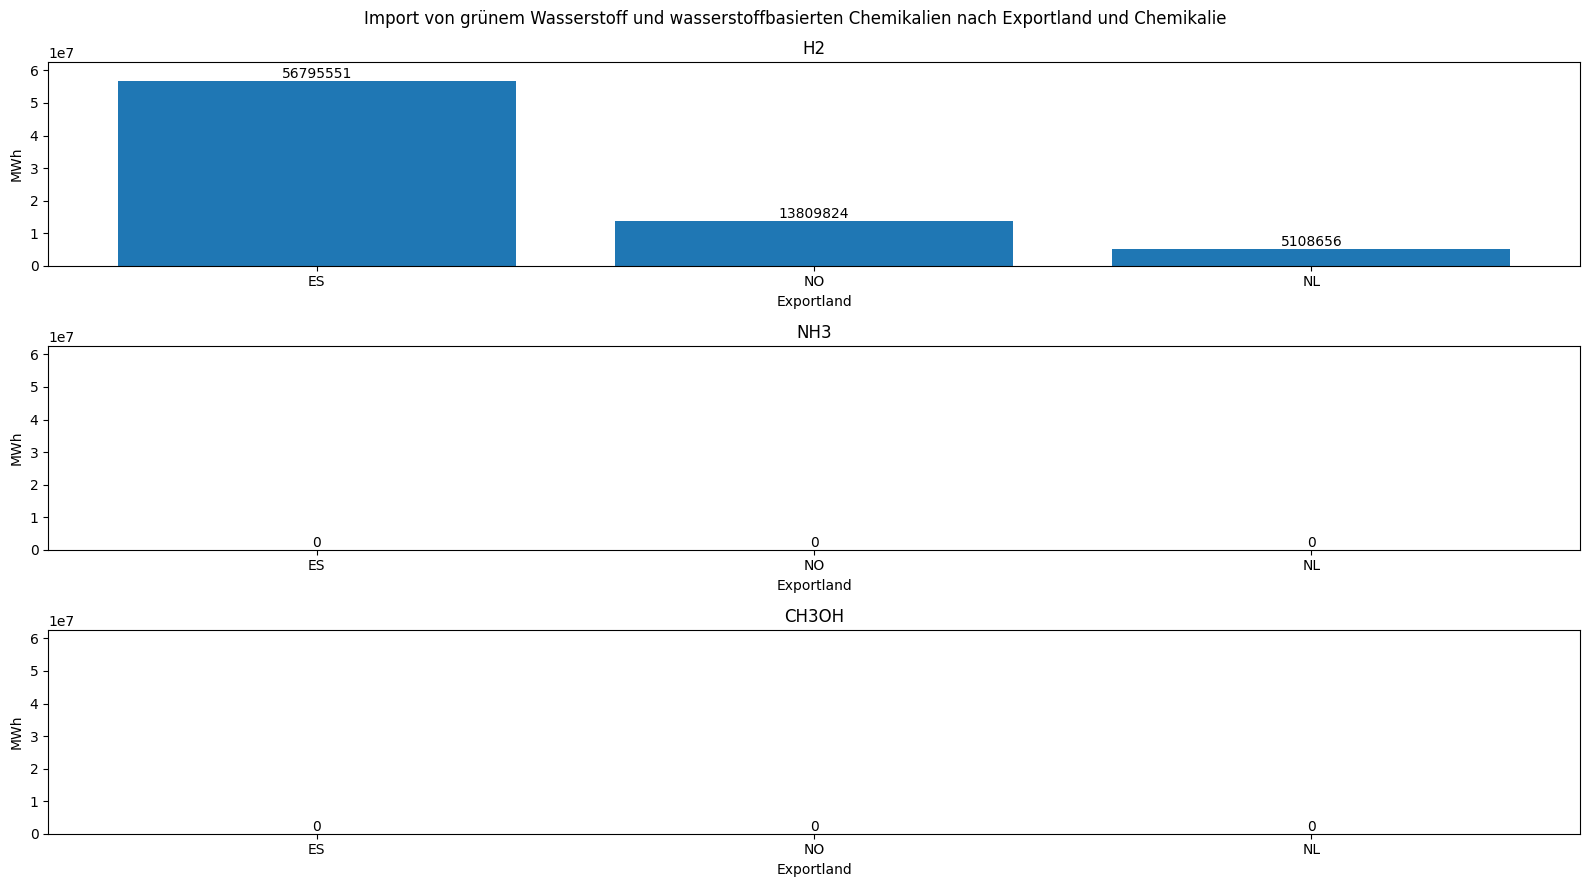

In [3]:
low_conversion_cost.visualize(what="commodities", vis_style="bar")

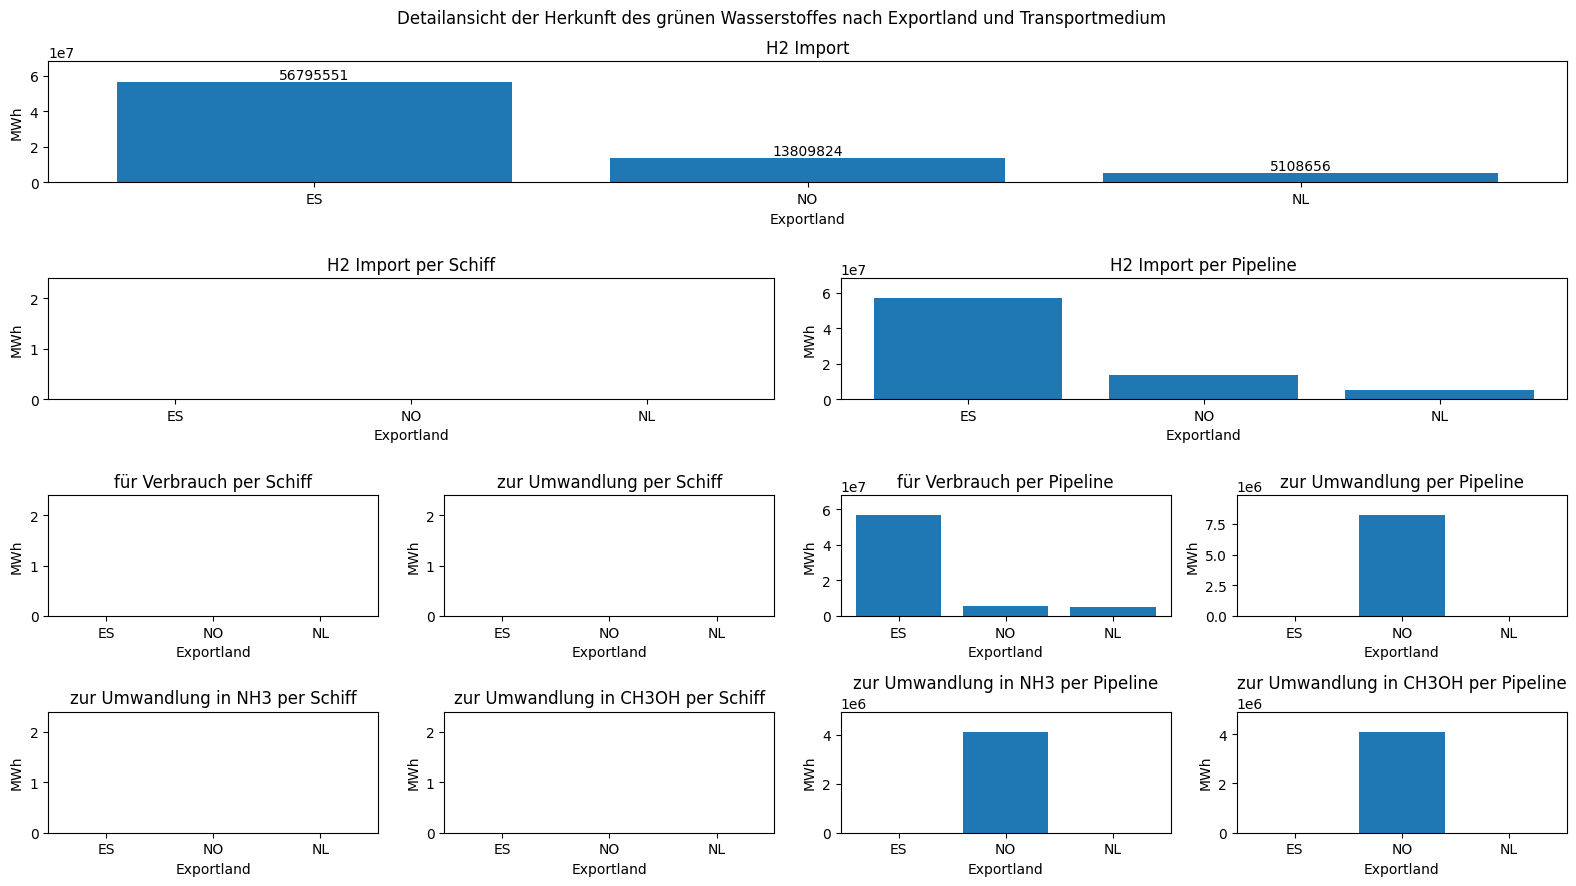

In [4]:
low_conversion_cost.visualize(what="hydrogen_conversion", vis_style="bar")
#plt.savefig("Umwandlung - Wasserstoff Detail")

In [8]:
# suppress scientific notation by setting float_format
pd.options.display.float_format = '{:,.2f}'.format
low_conversion_cost.results_df.loc[["NO"]]

,H2 Schiff,H2 Pipeline,H2 zu NH3 Schiff,H2 zu NH3 Pipeline,H2 für NH3 Umwandlung,H2 zu CH3OH Schiff,H2 zu CH3OH Pipeline,H2 für CH3OH Umwandlung,H2 für Umwandlung,H2 Import,...,NH3 Pipeline,NH3 Import,CH3OH Schiff,CH3OH Pipeline,CH3OH Import,Gesamter Import,H2 Gesamt Schiff,H2 Gesamt Pipeline,H2 für Umwandlung Schiff,H2 für Umwandlung Pipeline
Code,,,,,,,,,,,,,,,,,,,,,
NO,0.00,"5,595,792.28",0.00,"4,117,647.06","4,117,647.06",0.00,"4,096,385.54","4,096,385.54","8,214,032.60","13,809,824.88",...,0.00,0.00,0.00,0.00,0.00,"13,809,824.88",0.00,"13,809,824.88",0.00,"8,214,032.60"


In [5]:
3500/0.83

4216.8674698795185

In [6]:
low_conversion_cost_import_limits = hydro_opt(h2_to_nh3_plant_cost = 0, h2_to_ch3oh_plant_cost = 0, use_import_limits = True)
low_conversion_cost_import_limits.optimize()

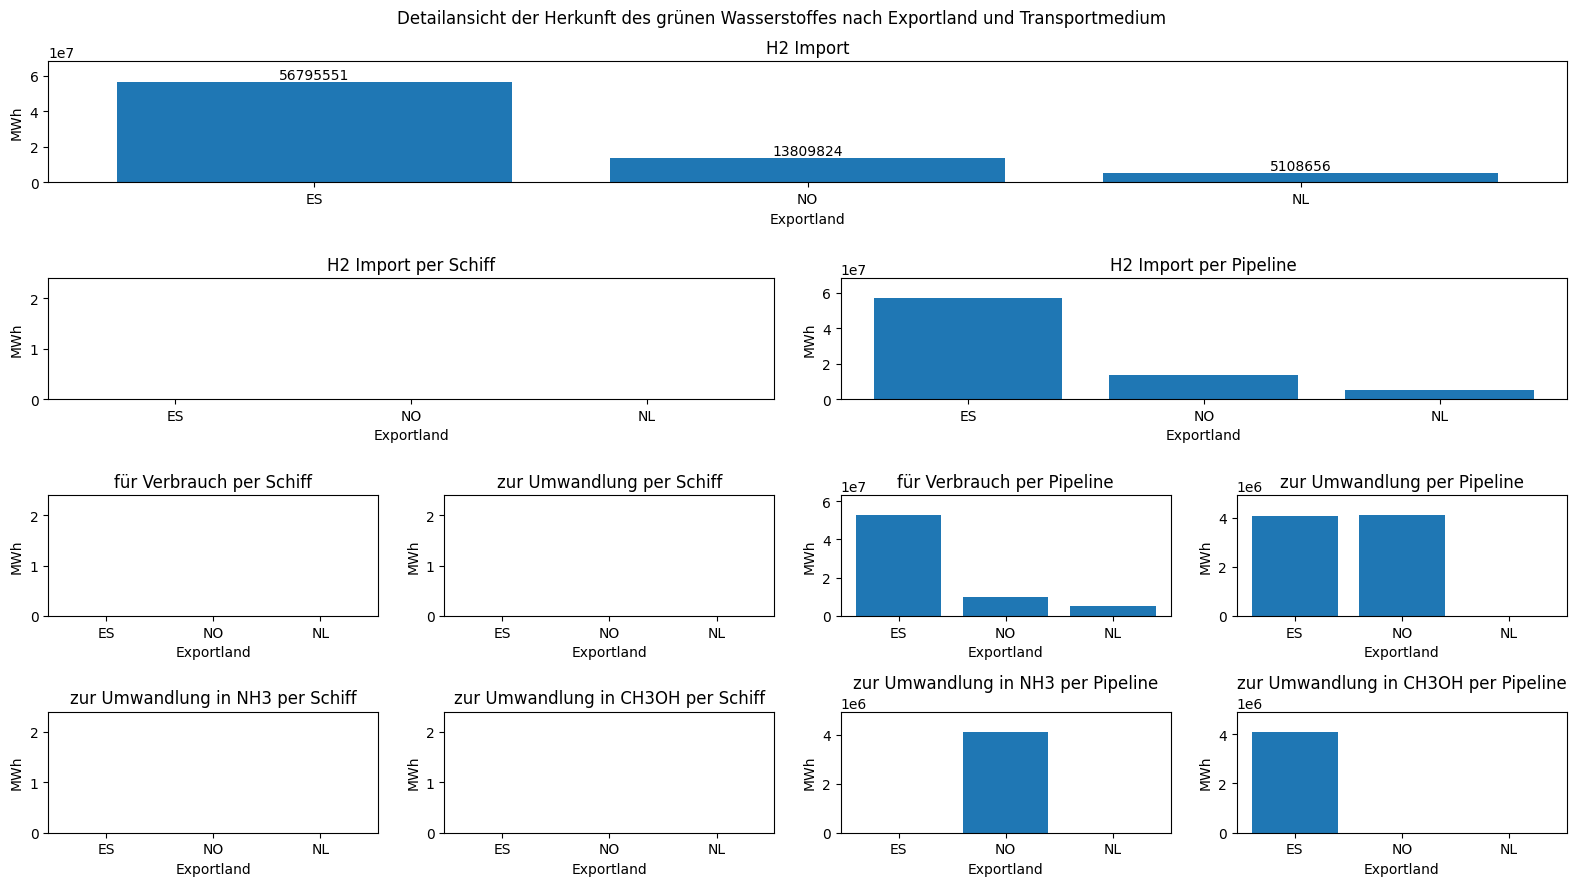

In [7]:
low_conversion_cost_import_limits.visualize(what="hydrogen_conversion", vis_style="bar")

In [14]:
plant_cost = 0
plant_costs =[]
h2_imports = []
nh3_imports = []
h2_to_nh3 = []
ch3oh_imports = []
h2_to_ch3oh = []
while 0 <= plant_cost <= 200:
    model = hydro_opt(de_el_price = 0, de_co2_price = 0, h2_to_nh3_plant_cost = plant_cost, h2_to_ch3oh_plant_cost = plant_cost)
    model.optimize()
    df = model.results_df
    h2_imports.append(df["H2 Import"].sum())
    nh3_imports.append(df["NH3 Import"].sum())
    h2_to_nh3.append(df["H2 für NH3 Umwandlung"].sum())
    ch3oh_imports.append(df["CH3OH Import"].sum())
    h2_to_ch3oh.append(df["H2 für CH3OH Umwandlung"].sum())
    plant_costs.append(plant_cost)
    plant_cost += 1


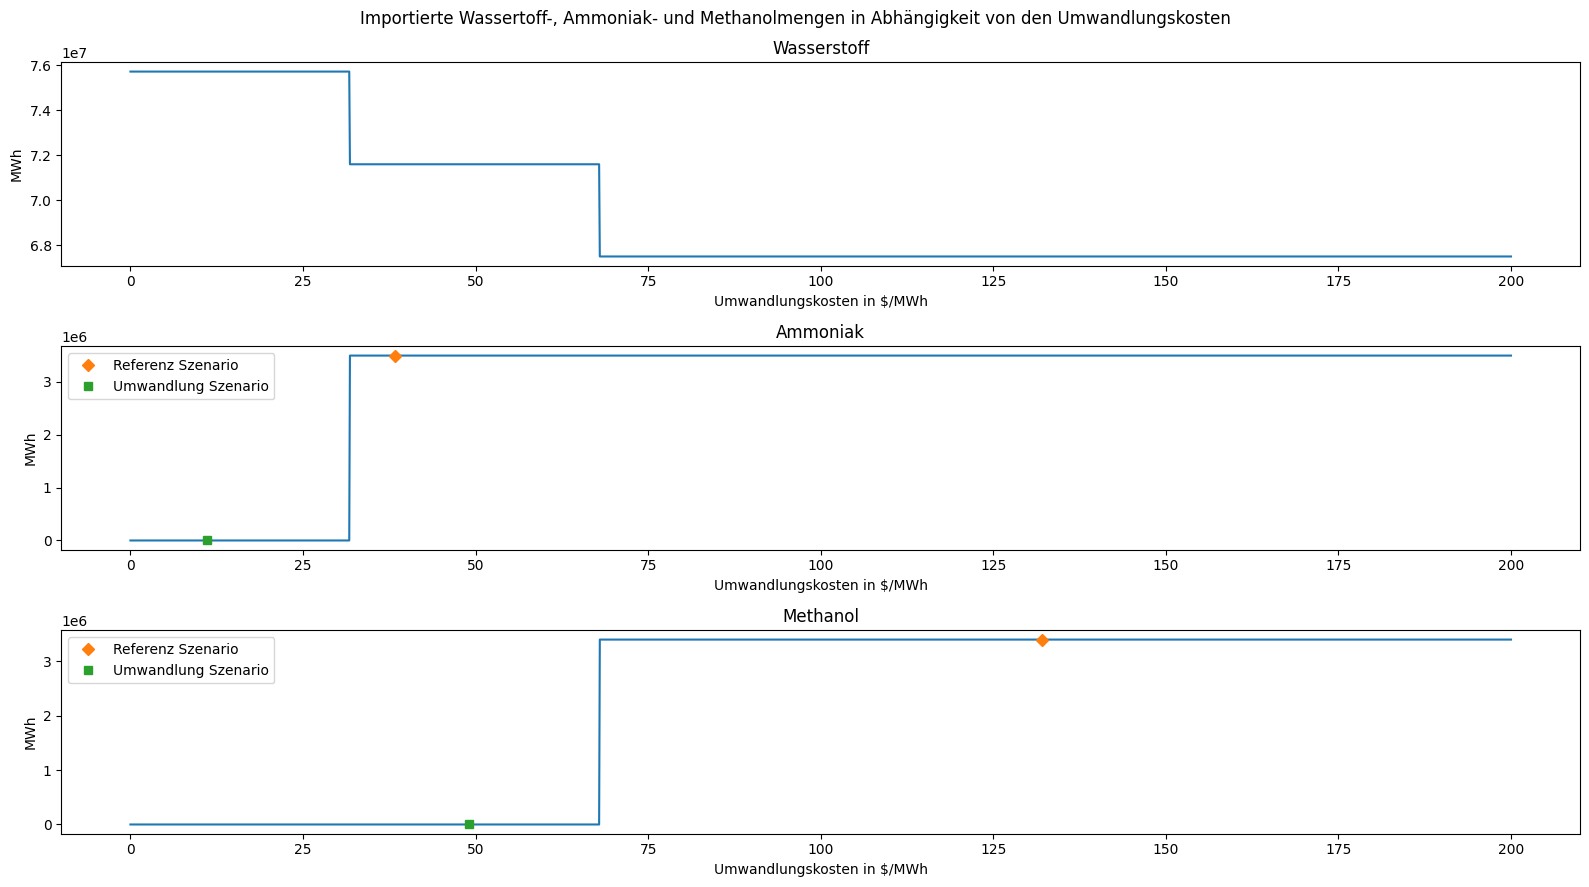

In [15]:
fig, ax = plt.subplots(3,1, figsize = (16,9))
fig.suptitle("Importierte Wassertoff-, Ammoniak- und Methanolmengen in Abhängigkeit von den Umwandlungskosten")  

ax[0].plot(plant_costs, h2_imports)
ax[0].set_title("Wasserstoff")
ax[0].set_ylabel("MWh")
ax[0].set_xlabel("Umwandlungskosten in $/MWh")

ax[1].plot(plant_costs, nh3_imports)
ax[1].plot(38.369,3500000, "D", label='Referenz Szenario')
ax[1].plot(11.0925,0, "s", label='Umwandlung Szenario')
ax[1].legend()
ax[1].set_title("Ammoniak")
ax[1].set_ylabel("MWh")
ax[1].set_xlabel("Umwandlungskosten in $/MWh")


ax[2].plot(plant_costs, ch3oh_imports)
ax[2].plot(132.0115,3400000, "D", label='Referenz Szenario')
ax[2].plot(49.0945,0, "s", label='Umwandlung Szenario')
ax[2].legend()
ax[2].set_title("Methanol")
ax[2].set_ylabel("MWh")
ax[2].set_xlabel("Umwandlungskosten in $/MWh")

plt.tight_layout()
#plt.savefig("Umwandlung - importierte Menge", bbox_inches="tight")

In [16]:
dict(zip(plant_costs, h2_imports))

{0: 75714032.6009922,
 0.1: 75714032.6009922,
 0.2: 75714032.6009922,
 0.30000000000000004: 75714032.6009922,
 0.4: 75714032.6009922,
 0.5: 75714032.6009922,
 0.6: 75714032.6009922,
 0.7: 75714032.6009922,
 0.7999999999999999: 75714032.6009922,
 0.8999999999999999: 75714032.6009922,
 0.9999999999999999: 75714032.6009922,
 1.0999999999999999: 75714032.6009922,
 1.2: 75714032.6009922,
 1.3: 75714032.6009922,
 1.4000000000000001: 75714032.6009922,
 1.5000000000000002: 75714032.6009922,
 1.6000000000000003: 75714032.6009922,
 1.7000000000000004: 75714032.6009922,
 1.8000000000000005: 75714032.6009922,
 1.9000000000000006: 75714032.6009922,
 2.0000000000000004: 75714032.6009922,
 2.1000000000000005: 75714032.6009922,
 2.2000000000000006: 75714032.6009922,
 2.3000000000000007: 75714032.6009922,
 2.400000000000001: 75714032.6009922,
 2.500000000000001: 75714032.6009922,
 2.600000000000001: 75714032.6009922,
 2.700000000000001: 75714032.6009922,
 2.800000000000001: 75714032.6009922,
 2.9000000